In [2]:
import plotly.express as px
df = px.data.gapminder()
df.head()
#df.dtypes


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [3]:

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

In [5]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add table data
table_data = [['Team', 'Wins', 'Losses', 'Ties'],
              ['Montréal<br>Canadiens', 18, 4, 0],
              ['Dallas Stars', 18, 5, 0],
              ['NY Rangers', 16, 5, 0],
              ['Boston<br>Bruins', 13, 8, 0],
              ['Chicago<br>Blackhawks', 13, 8, 0],
              ['Ottawa<br>Senators', 12, 5, 0]]
#Initialize a figure with ff.create_table(table_data)
fig = ff.create_table(table_data, height_constant=60)

# Add graph data
teams = ['Montréal Canadiens', 'Dallas Stars', 'NY Rangers',
         'Boston Bruins', 'Chicago Blackhawks', 'Ottawa Senators']
GFPG = [3.54, 3.48, 3.0, 3.27, 2.83, 3.18]
GAPG = [2.17, 2.57, 2.0, 2.91, 2.57, 2.77]

# Make traces for graph
trace1 = go.Bar(x=teams, y=GFPG, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='Goals For<br>Per Game')
trace2 = go.Bar(x=teams, y=GAPG, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='Goals Against<br>Per Game')

# Add trace data to figure
fig.add_traces([trace1, trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': '2016 Hockey Stats'})

# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':800})

# Plot!
fig.show()

In [7]:
import plotly.graph_objects as go
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

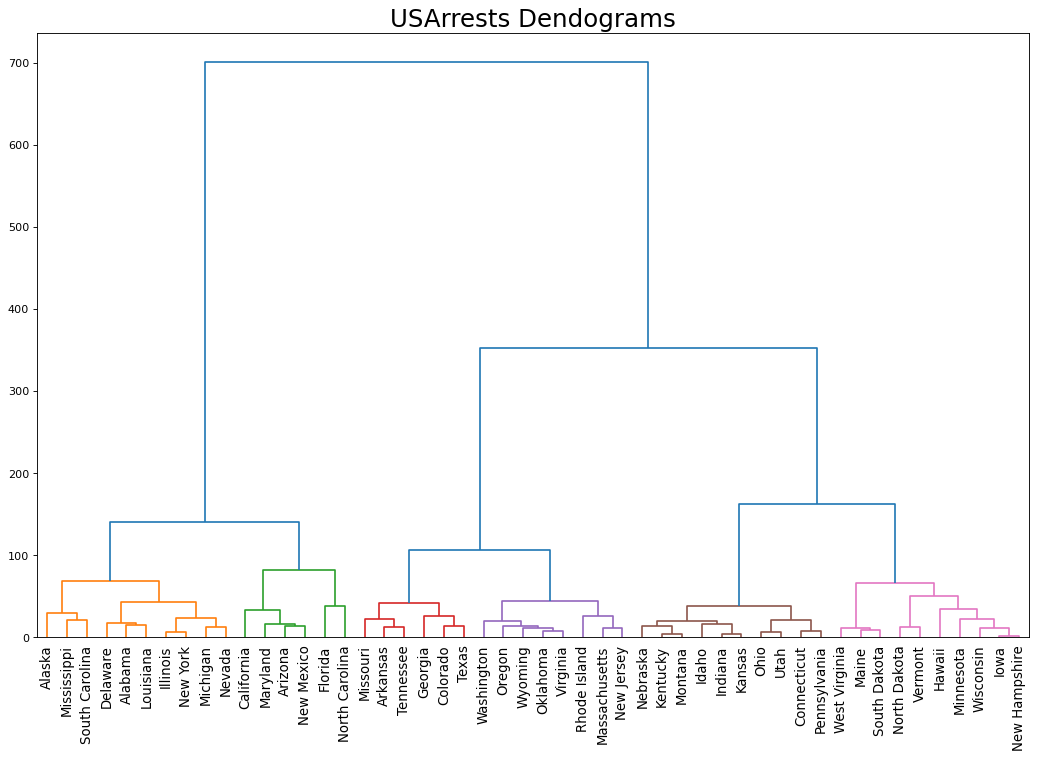

In [9]:
import scipy.cluster.hierarchy as shc
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

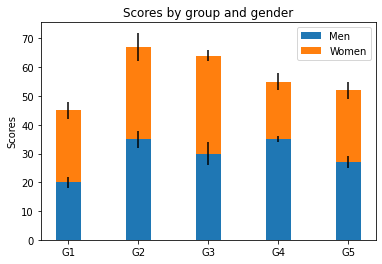

In [10]:
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

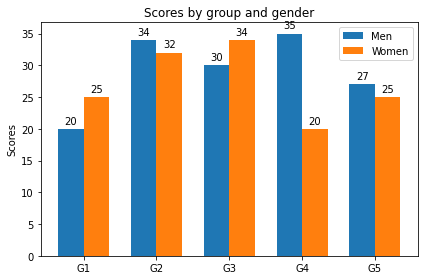

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()